# Модуль 2.
## Лекція 07. Приклад 1. Метод k найближчіх сусідів (kNN).

Завантаження бібліотек

In [1]:
import tensorflow as tf
from pprint import pprint
print(tf.__version__)
print(tf.executing_eagerly())

2.15.0
True


In [2]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import numpy as np

Генеруємо випадкові ознаки обєктів двох класів. Кожен обєкт має 2 ознаки (x,  y).
Нормальный розподіл

In [3]:
# Середні значення для перешого класу
Class_1_Center = np.array([3.0, 4.0])
# Середні значення для другого класу
Class_2_Center = np.array([4.0, 3.0])

# Середнє квадратичне відхилення для перщого класу
Class_1_x_std = 1.0
Class_1_y_std = .5
# Середнє квадратичне відхилення для другого класу
Class_2_x_std = .5
Class_2_y_std = 1.0


In [27]:
# Точки першого класу
Num_points_Class_1 = 50
Class_1_Data =  np.zeros((2,Num_points_Class_1), dtype=np.float32)
Class_1_Data[0,:] = np.random.default_rng().normal(Class_1_Center[0], Class_1_x_std, Num_points_Class_1)
Class_1_Data[1,:] = np.random.default_rng().normal(Class_1_Center[1], Class_1_y_std, Num_points_Class_1)
print(np.min(Class_1_Data[0,:]),np.max(Class_1_Data[0,:]) )

0.3375646 5.6045876


In [28]:
# Точки другого класу
Num_points_Class_2 = 60
Class_2_Data =  np.zeros((2,Num_points_Class_2), dtype=np.float32)
Class_2_Data[0,:] = np.random.default_rng().normal(Class_2_Center[0], Class_2_x_std, Num_points_Class_2)
Class_2_Data[1,:] = np.random.default_rng().normal(Class_2_Center[1], Class_2_y_std, Num_points_Class_2)

Графік даних

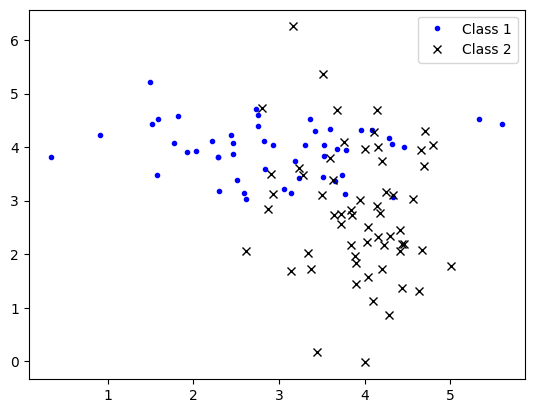

In [32]:
# Plot all the data
plt.plot(Class_1_Data[0,:], Class_1_Data[1,:], '.', color = 'blue', label="Class 1")
plt.plot(Class_2_Data[0,:], Class_2_Data[1,:], 'x', color = 'black', label="Class 2")
plt.legend()
plt.show()

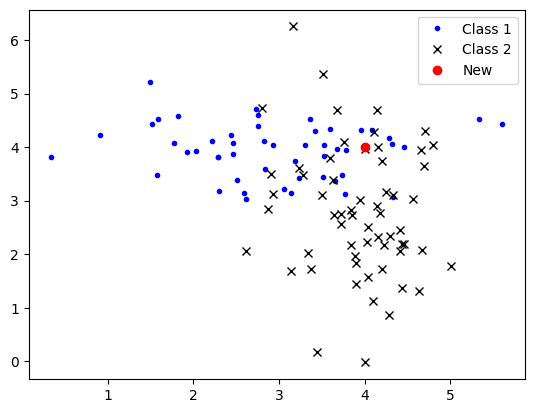

In [30]:
# Довільна нова точка. Ло якого класу вілнести ?
x_new = 4
y_new = 4
new_point = np.array([x_new, y_new])
# print(x_new, y_new, new_point)
plt.plot(Class_1_Data[0,:], Class_1_Data[1,:], '.', color = 'blue', label="Class 1")
plt.plot(Class_2_Data[0,:], Class_2_Data[1,:], 'x', color = 'black', label="Class 2")
plt.plot(x_new, y_new, 'o', color = 'red', label="New")
plt.legend()
plt.show()

Формування загального масиву обєктів з мітками класів

In [15]:
Num_points = Num_points_Class_1 + Num_points_Class_2
Points =  np.zeros((3,Num_points), dtype=np.float32)
Points[:2,:Num_points_Class_1] = Class_1_Data
Points[2,:Num_points_Class_1] = 1.0
Points[:2,Num_points_Class_1:] = Class_2_Data
Points[2,Num_points_Class_1:] = 2.0
print(Num_points,Points)


110 [[3.0770261  2.5791678  4.643535   2.5466173  2.277644   4.928594
  2.3039644  3.3169415  3.729685   1.8775601  1.2527745  2.9859848
  3.942546   2.9390333  2.524223   2.7824013  2.8121204  3.1777096
  3.4172485  3.2373595  3.3221574  3.6445644  4.0015626  3.4293036
  4.744479   3.0729785  1.0758224  3.0658326  4.045894   2.3470416
  1.2814515  2.6865509  3.5550098  3.928465   3.0144022  3.3626776
  4.7917614  5.2044024  2.0773144  2.8865316  4.191967   3.8629177
  3.2063694  2.2825928  5.635619   3.377518   1.2462153  2.9705386
  3.7803257  2.8341203  4.192697   4.5394597  3.7848227  4.2184067
  4.5380917  3.7292635  4.1891317  3.324029   4.6658998  4.0511494
  3.851811   5.203158   4.3713117  3.5782986  3.6655216  3.817827
  3.4044836  4.1258683  3.8245044  3.7988307  3.0962908  3.8530483
  4.3505983  3.7956052  3.5297244  4.3290796  4.608516   4.1938477
  4.179681   3.967856   3.5908127  4.9424167  5.201296   4.3991723
  3.5438297  4.0247993  3.1595943  3.9347477  3.5179195  4.5

Обчислення відстані:

In [16]:
# Відстань L2 (Евклід)
def distance (x,y):
   return np.sqrt(np.dot(x-y, x-y))

In [18]:
# Наприклад, відстань
Points[:2,0]

array([3.0770261, 3.9896612], dtype=float32)

In [33]:
# Відстань до нової точки
dist =  np.zeros((2,Num_points), dtype=np.float32)
for i in range(Num_points):
  dist[0,i] = distance(new_point,Points[:2,i] )
dist[1,:] = Points[2,:]
print(dist)

[[0.92303175 1.5692475  0.6437151  1.6756165  1.7372112  1.2480431
  1.739404   0.820494   0.5905479  2.2822008  2.7526543  1.6270429
  0.6867509  1.1325445  1.5995886  1.3905772  1.1912591  0.82458836
  0.6353655  1.4133725  0.7621648  0.75474715 0.24032386 0.5710139
  1.125741   0.98819315 2.927518   1.0050696  0.21015534 1.7018436
  2.7465372  1.3318877  0.6316287  0.40866157 1.2751337  0.6662132
  1.0116712  1.368251   1.9522597  1.1144608  0.26468843 0.38274255
  0.7936961  1.7675216  1.9089997  0.70286685 2.8097894  1.0547303
  0.42675105 1.2338082  1.6899531  0.6448718  0.5600652  1.1138977
  1.6525898  2.608472   0.9801872  1.1622233  0.8359012  0.7302772
  0.17608492 2.0580173  0.6268939  0.6133477  3.8066652  0.55565506
  1.3899498  0.87266797 2.1413689  1.40537    1.0835589  1.3050541
  0.43931925 0.35509998 0.7585328  0.74318534 3.2881625  1.878849
  0.511491   2.6539662  0.6476881  0.9753782  1.2720039  1.1978347
  0.5073553  0.02507883 2.516583   1.0921425  2.3853586  1.0

Сортування та вітбір K сусідів

In [34]:
dist_sort = dist[:, dist[0].argsort()]
print(dist_sort)

[[0.02497464 0.02507883 0.17608492 0.21015534 0.24032386 0.26468843
  0.35509998 0.38274255 0.389022   0.39084995 0.40866157 0.42675105
  0.43931925 0.5073553  0.511491   0.55565506 0.5600652  0.5710139
  0.5822459  0.5905479  0.6133477  0.6268939  0.6316287  0.6353655
  0.6437151  0.6448718  0.6476881  0.6662132  0.6867509  0.70286685
  0.71840304 0.7302772  0.74318534 0.75474715 0.7585328  0.7621648
  0.7936961  0.820494   0.82458836 0.8359012  0.84036475 0.87266797
  0.92303175 0.9753782  0.9794011  0.9801872  0.98819315 1.0050696
  1.0116712  1.0533447  1.0547303  1.0835589  1.0921425  1.1138977
  1.1144608  1.125741   1.1325445  1.1622233  1.1912591  1.1978347
  1.2228636  1.2338082  1.2480431  1.2720039  1.2751337  1.3050541
  1.3318877  1.368251   1.3899498  1.3905772  1.40537    1.4133725
  1.4563911  1.4646862  1.5050067  1.5692475  1.5928969  1.5995886
  1.6270429  1.6525898  1.6623887  1.6756165  1.6899531  1.6938186
  1.7018436  1.7372112  1.739404   1.7675216  1.878849   1

In [38]:
k = 9 # Кількість найближчих
class_1 = 0
class_2 = 0
for i in range(k):
  if dist_sort[1,i] > 1.5:
    class_2 += 1
  else:
    class_1 += 1

Answer = 'Class 1'
if class_2 > class_1 : Answer = 'Class 2'
print('Vote', class_1, class_2, 'Відноситься до ', Answer)

Vote 4 5 Відноситься до  Class 2
